<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***YOLOv4 Detecção de objetos em Vídeo***
---

In [24]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<TIA\>,\<nome\>*)
Aluno1 = '31959891, Gianlucca Lapate' #@param {type:"string"} 
Aluno2 = '31959891, Gabriel Martins' #@param {type:"string"}
Aluno3 = '31909825, Joao Olivetti' #@param {type:"string"}
Aluno4 = '31911943, Lucas Pereira Santos' #@param {type:"string"}




# **Resumo (*Abstract*)**

Neste trabalho, passaremos por todas as etapas para realizar as detecções de objetos YOLOv4 em sua webcam enquanto estiver no Google Colab. Usaremos o YOLOv4, um dos detectores de objetos mais rápido e mais preciso que existem atualmente. Para a detecção, precisamos de um modelo capaz de prever várias classes em uma imagem e retornar a localização desses objetos para que possamos colocar caixas sobre a imagem.

# **Referencial Teórico**

Apresente os principais conceitos da tecnologia ou princípio explorado no seu trabalho (o que é? como funciona? Suas aplicações). Não deixe de indicar referências e incluir ilustrações/esquemas quando necessário. Empregue 2-3 páginas. 


Estamos utilizando o YOLOV4, que é um algoritmo de detecção de objetos de última geração. Ele pode ser encontrado hoje em sistemas de detecção e monitoramento em tempo real, como câmeras de CFTV e veículos de direção autônoma. É famoso por ser muito preciso e rápido ao mesmo tempo. YOLOv4 é uma das versões mais recentes da família YOLO.

<img src='https://miro.medium.com/max/1400/0*1OGVvwN2dXU5Sh7a.png' width="800" height="400">

Mas como funciona o Yolo?

Ele cria um grid na imagem e após criar esse grid, o algoritmo irá chegar em cada um dos quadrados a probabilidade de ter uma classe (pessoa, celular, cachorro...), e assim colocar uma BoundingBoxes. Note que em mais de quadrado pode ter a mesma classe (o corpo de uma pessoa pode ocupar mais de um quadrado), então para isso foi feito uma IOU (intersection of union), ou seja, as BoundingBoxes que forem sendo criadas uma em cima da outra serão unificadas. E claro, como as boxes serão unificadas, a probabilidade da classe para cada uma das predições também serão somadas e depois feito a média.


<img src='https://miro.medium.com/max/1400/1*MB2XKSNOZGOHVcV2oei-8Q.png' width="800" height="400">

# **Conceitos Chave**
# **Conceitos Chave**

#1 Detecção de Objetos
A detecção de objetos é uma tecnologia informática relacionada à visão por computador, processamento de imagens e aprendizagem profunda que lida com a detecção de instâncias de objetos em imagens e vídeos. Faremos a detecção de objetos neste artigo usando algo conhecido como haar cascades.

#2 YOLOV4
YOLOv4 é projetado usando CSPDarknet53 como Espinha dorsal, SPP (Spatial pyramid pooling) e PAN (Path Aggregation Network) para o que é chamado de "o Pescoço", e YOLOv3 para "a Cabeça".
<img src='https://miro.medium.com/max/720/1*I5l_B6nj9uX-EblHSp-kFg.png' width="800" height="400">
<br>
CSPNet é um método de otimização com o objetivo de dividir o mapa de características da camada base em duas partes e depois fundi-las através de uma hierarquia de estágios cruzados.
<br>
O SPP é um método de aquisição de informações finas e grosseiras através do pooling simultâneo em vários tamanhos de kernel
<br>
PAN é uma técnica que alavanca a informação em camadas próximas à entrada, transportando recursos de diferentes níveis de espinha dorsal para o Detector.

#2 Redes Convolucionais (CNNs)
As Redes Neurais Convolucionais possum um histórico de alta acurácia para o problema de reconhecimento de imagem. A ideia principal de uma Rede Convolucional é filtrar linhas, curvas e bordas e em cada camada acrescida transformar essa filtragem em uma imagem mais complexa. 

# **Exemplo de Aplicação**

Nosso projeto tinha como objetivo reconhecer objetos em vídeo. Porém, pensamos além do vídeo gravado, queriamos algo real-time. Para isso, encontramos uma solução que captura o vídeo de sua webcam e identifica alguns objetos real-time


# **Exemplo de Código**

In [25]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

Clonagem e instalação de Darknet para YOLOv4
Estaremos usando o famoso repositório Darknet do AlexeyAB neste tutorial para realizar detecções YOLOv4.

In [2]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.17 MiB | 24.14 MiB/s, done.
Resolving deltas: 100% (10405/10405), done.


In [3]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


In [4]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

In [5]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq" -O yolov4-csp.weights && rm -rf /tmp/cookies.txt

--2022-11-26 18:25:10--  https://docs.google.com/uc?export=download&confirm=t&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq
Resolving docs.google.com (docs.google.com)... 108.177.98.101, 108.177.98.138, 108.177.98.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.98.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0fse6invgppprjvurodfvoh87rvkmk7c/1669487100000/17800843676226924807/*/1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq?e=download&uuid=bea7b16c-597f-482f-ade8-807021451fb7 [following]
--2022-11-26 18:25:11--  https://doc-14-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0fse6invgppprjvurodfvoh87rvkmk7c/1669487100000/17800843676226924807/*/1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq?e=download&uuid=bea7b16c-597f-482f-ade8-807021451fb7
Resolving doc-14-84-docs.googleusercontent.com (doc-14-84-docs.googleusercontent.com)... 74.125.199.132, 

Darknet para Python
A fim de utilizar YOLOv4 com código Python, usaremos algumas das funções pré-construídas encontradas em darknet.py, importando as funções para nossa estação de trabalho.

In [6]:
# import darknet functions to perform object detections
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("cfg/yolov4-csp.cfg", "cfg/coco.data", "yolov4-csp.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

YOLOv4 Exemplo sobre imagem de teste
Vamos nos certificar de que nosso modelo foi carregado com sucesso e que podemos fazer detecções corretamente em uma imagem de teste.

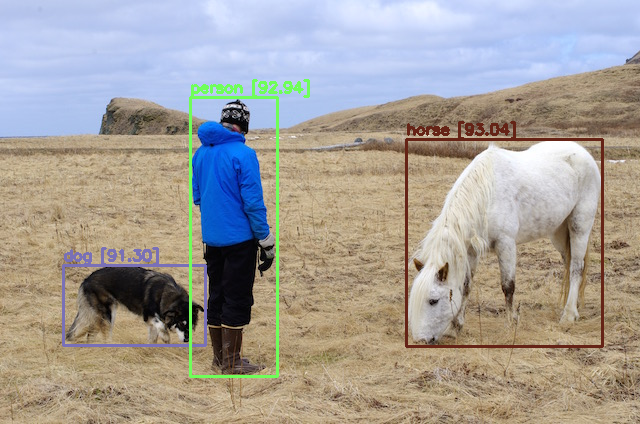

In [15]:
# run test on person.jpg image that comes with repository
image = cv2.imread("data/person.jpg")
detections, width_ratio, height_ratio = darknet_helper(image, width, height)

for label, confidence, bbox in detections:
  left, top, right, bottom = bbox2points(bbox)
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  cv2.rectangle(image, (left, top), (right, bottom), class_colors[label], 2)
  cv2.putText(image, "{} [{:.2f}]".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    class_colors[label], 2)
cv2_imshow(image)

Helper Functions
Aqui estão definidas algumas funções de ajuda que serão usadas para converter facilmente entre diferentes tipos de imagens dentro de nossas etapas posteriores.

In [8]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

## YOLOv4 em Webcam Videos
A execução do YOLOv4 no vídeo da webcam é um pouco mais complexa do que as imagens. Precisamos iniciar um fluxo de vídeo usando nossa webcam como entrada. Em seguida, passamos cada quadro por nosso modelo YOLOv4 e criamos uma imagem sobreposta que contém caixa(s) de detecção(ões). Em seguida, sobrepomos a imagem da caixa de delimitação de volta para o próximo quadro de nosso fluxo de vídeo. 

O YOLOv4 é tão rápido que pode executar as detecções em tempo real!

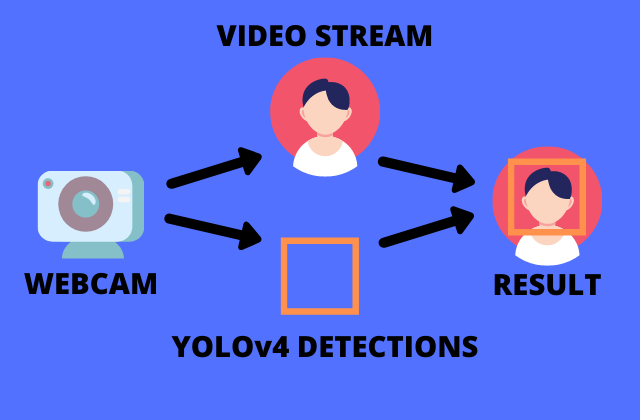

Abaixo está uma função para iniciar o fluxo de vídeo usando o JavaScript similar ao usado para imagens. Os quadros do fluxo de vídeo são alimentados como entrada para YOLOv4.

In [9]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

Rodando em vídeo da Webcam

In [27]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

# **Uma ideia de Projeto de Aplicação**

Aproveitando o clima da Copa do Mundo, nosso grupo pensou em utilizar esta ideia de projeto nos Estádios do Catar. Poderia reconhecer diversos objetos que não são permitidos e a segurança atuar em cima desses resultados


# **Referencial Teorico**

ALVES, G. Detecção de Objetos com YOLO - Uma abordagem moderna. Disponível em: <https://iaexpert.academy/2020/10/13/deteccao-de-objetos-com-yolo-uma-abordagem-moderna/>. Acesso em: 26 nov. 2022.
<br><br>
ALVES, G. Entendendo Redes convolucionais (CNNs) - neuronio BR - medium. Disponível em: <https://medium.com/neuronio-br/entendendo-redes-convolucionais-cnns-d10359f21184>. Acesso em: 26 nov. 2022
<br><br>

BOCHKOVSKIY, A.; WANG, C.-Y.; LIAO, H.-Y. M. YOLOv4: Optimal speed and accuracy of object detection. 2020.
<bR><br>

SOLAWETZ, J. YOLOv4 - An explanation of how it works. Disponível em: <https://blog.roboflow.com/a-thorough-breakdown-of-yolov4/>. Acesso em: 26 nov. 2022.

<br><br>

‌

In [22]:
#@title **Avaliação**
Referencial_Teorico = 10 #@param {type:"slider", min:0, max:10, step:1}

Conceitos_Chave = 10 #@param {type:"slider", min:0, max:10, step:1}

Exemplo_Aplicacao = 10 #@param {type:"slider", min:0, max:10, step:1}

Ideia_Projeto = 10 #@param {type:"slider", min:0, max:10, step:1}

Conclusao = 10 #@param {type:"slider", min:0, max:10, step:1}








In [23]:
#@title **Nota Final**
nota = Referencial_Teorico + Conceitos_Chave + 2*Exemplo_Aplicacao + 2*Ideia_Projeto + Conclusao

nota = nota / 7

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,5):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 10.0



,tia,nome,nota
0,31959891,GIANLUCCA LAPATE,10.0
1,31959891,GABRIEL MARTINS,10.0
2,31909825,JOAO OLIVETTI,10.0
3,31911943,LUCAS PEREIRA SANTOS,10.0
